# Converting ATN netCDF file to Dawrin Core

Created: 2022-03-23

This notebook walks through downloading an example netCDF file from the ATN GitHub repository and translating it to a Darwin Core Archive compliant package for easy loading and publishing via the Integrated Publishing Toolkit (IPT). The example file follows a specific specification for ATN satellite trajectory observations as documented [here](https://github.com/ioos/ioos-atn-data/blob/main/templates/atn_trajectory_template.cdl). More information about the ATN netCDF specification can be found in the repository https://github.com/ioos/ioos-atn-data.

Since most of the examples in the IOOS Code Lab are in the python programming language, we wanted to show an example of working with a netCDF file in the R programming language to be inclusive of those users. 

For more information on the tidync package, see this R blog: [https://ropensci.org/blog/2019/11/05/tidync/](https://ropensci.org/blog/2019/11/05/tidync/)

Data used in this notebook are available from NCEI at the following link https://www.ncei.noaa.gov/archive/accession/0282699.

In [1]:
#Load libraries

library(tidync)
library(obistools)
library(ncdf4)
library(tidyverse) #includes stringr
library(lubridate)
library(maps)
library(mapdata)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

-- Attaching packages ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.2     v purrr   1.0.1
v tibble  3.2.1     v dplyr   1.1.1
v tidyr   1.3.0     v stringr 1.5.0
v readr   2.1.4     v forcats 1.0.0
-- Conflicts -----------------------------------------------------------------------------------------------------------------------------------------

In [2]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19045)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] mapdata_2.3.1    maps_3.4.1       lubridate_1.9.2  forcats_1.0.0   
 [5] stringr_1.5.0    dplyr_1.1.1      purrr_1.0.1      readr_2.1.4     
 [9] tidyr_1.3.0      tibble_3.2.1     ggplot2_3.4.2    tidyverse_1.3.2 
[13] ncdf4_1.21       obistools_0.0.10 tidync_0.3.0    

loaded via a namespace (and not attached):
 [1] httr_1.4.6          jsonlite_1.8.4      modelr_0.1.11      
 [4] sp_2.0-0            googlesheets4_1.1.0 cellranger_1.1.0   
 [7] pillar_1.9.0        backports_1.4.1     lattice_0.20-45 

## Download the netCDF file from the NCEI Archive

See https://www.ncei.noaa.gov/archive/accession/0282699

In [3]:
url = 'https://www.nodc.noaa.gov/archive/arc0217/0282699/1.1/data/0-data/atn_45866_great-white-shark_trajectory_20090923-20091123.nc'

#fname = str_split_i(url, "/", i=-1)
fname = basename(url)

download.file(url, fname, mode = "wb")

## Open the netCDF file
Once the file is opened, we print out the details of what the netCDF file contains.

In [4]:
atn <- nc_open(fname)
atn

File atn_45866_great-white-shark_trajectory_20090923-20091123.nc (NC_FORMAT_NETCDF4):

     36 variables (excluding dimension variables):
        string deploy_id[]   (Contiguous storage)  
            long_name: id for this deployment. This is typically the tag ptt
            comment: Friendly name given to the tag by the user. If no specific friendly name is given, this is the PTT id.
            coordinates: time z lon lat
            instrument: instrument_location
            platform: animal
            coverage_content_type: referenceInformation
            _FillValue: -9999
        double time[obs]   (Contiguous storage)  
            units: seconds since 1990-01-01 00:00:00Z
            standard_name: time
            axis: T
            _CoordinateAxisType: Time
            calendar: standard
            long_name: Time of the measurement, in seconds since 1990-01-01
            actual_min: 2009-09-23T00:00:00Z
            actual_max: 2009-11-23T05:12:00Z
            ancilla

## Collect all the metadata from the netCDF file.

This gathers not only the global attributes, but the variable level attributes as well. As you can see in the **variable** column the term `NC_GLOBAL` refers to global attributes.

In [5]:
metadata <- ncmeta::nc_atts(fname)
metadata

id,name,variable,value
<int>,<chr>,<chr>,<named list>
0,long_name,deploy_id,id for this deployment. This is typically the tag ptt
1,comment,deploy_id,"Friendly name given to the tag by the user. If no specific friendly name is given, this is the PTT id."
2,coordinates,deploy_id,time z lon lat
3,instrument,deploy_id,instrument_location
4,platform,deploy_id,animal
5,coverage_content_type,deploy_id,referenceInformation
6,_FillValue,deploy_id,-9999
0,units,time,seconds since 1990-01-01 00:00:00Z
1,standard_name,time,time


## Example extracting `long_name` attributes

To give you an idea of what observations are in this file, we can print out the human readable `long_name` attribute from all the variables.

In [6]:
metadata %>% dplyr::filter(name == "long_name")

id,name,variable,value
<int>,<chr>,<chr>,<named list>
0,long_name,deploy_id,id for this deployment. This is typically the tag ptt
5,long_name,time,"Time of the measurement, in seconds since 1990-01-01"
2,long_name,z,depth of measurement
2,long_name,lat,Latitude portion of location in decimal degrees North
2,long_name,lon,Longitude portion of location in decimal degrees East
2,long_name,ptt,Platform Transmitter Terminal (PTT) id used for Argos transmissions
2,long_name,instrument,Instrument family
2,long_name,type,"Type of location information - Argos, GPS satellite or user provided location"
3,long_name,location_class,Location Quality Code from ARGOS satellite system


## Store the data as a tibble in a variable
Collect the data dimensioned by `time` from the netCDF file as a tibble. Then, print the first ten rows.

In [7]:
options(repr.matrix.max.cols=35)

atn <- tidync(fname)

atn_tbl <- atn %>% hyper_tibble(force=TRUE)

head(atn_tbl, n=4)

time,z,lat,lon,ptt,instrument,type,location_class,error_radius,semi_major_axis,semi_minor_axis,ellipse_orientation,offset,offset_orientation,gpe_msd,gpe_u,count,qartod_time_flag,qartod_speed_flag,qartod_location_flag,qartod_rollup_flag,comment,obs
<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
622512000,0,34.030,-118.560,45866,SPOT,User,nan,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,2,1,1,,1
622708920,0,23.590,-166.180,45866,SPOT,Argos,A,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,4,1,4,,2
622724940,0,34.024,-118.556,45866,SPOT,Argos,1,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,4,1,4,,3
622725060,0,34.035,-118.549,45866,SPOT,Argos,0,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,4,1,4,,4


## Dealing with time

Notice the data in the **time** column aren't formatted as times. We need to read the metadata associated with the time variable to understand what the units are. Below, we print a tibble of all the attributes from the **time** variable.

Notice the _units_ attribute and it's value of `seconds since 1990-01-01 00:00:00Z`. We need to use that information to convert the time variable to something useful that `ggplot` can handle.

In [8]:
time_attrs <- metadata %>% dplyr::filter(variable == "time")
time_attrs

id,name,variable,value
<int>,<chr>,<chr>,<named list>
0,units,time,seconds since 1990-01-01 00:00:00Z
1,standard_name,time,time
2,axis,time,T
3,_CoordinateAxisType,time,Time
4,calendar,time,standard
5,long_name,time,"Time of the measurement, in seconds since 1990-01-01"
6,actual_min,time,2009-09-23T00:00:00Z
7,actual_max,time,2009-11-23T05:12:00Z
8,ancillary_variables,time,qartod_time_flag qartod_rollup_flag qartod_speed_flag


So, we grab the value from the `units` attribute, split the string to collect the date information, and apply that to a time conversion function `as.POSIXct`.

In [9]:
#library(stringr) - loaded with tidyverse
# grab origin date from time variable units attribute
tunit <- time_attrs %>% dplyr::filter(name == "units")
lunit <- str_split(tunit$value,' ')[[1]]
atn_tbl$time <- as.POSIXct(atn_tbl$time, origin=lunit[3], tz="GMT")

head(atn_tbl, n=2)

time,z,lat,lon,ptt,instrument,type,location_class,error_radius,semi_major_axis,semi_minor_axis,ellipse_orientation,offset,offset_orientation,gpe_msd,gpe_u,count,qartod_time_flag,qartod_speed_flag,qartod_location_flag,qartod_rollup_flag,comment,obs
<dttm>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
2009-09-23 00:00:00,0,34.03,-118.56,45866,SPOT,User,nan,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,2,1,1,,1
2009-09-25 06:42:00,0,23.59,-166.18,45866,SPOT,Argos,A,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,4,1,4,,2


## Plotting the raw data

Now lets make some plots just to take a look at what data we're working with. Here we make a plot of time vs longitude.

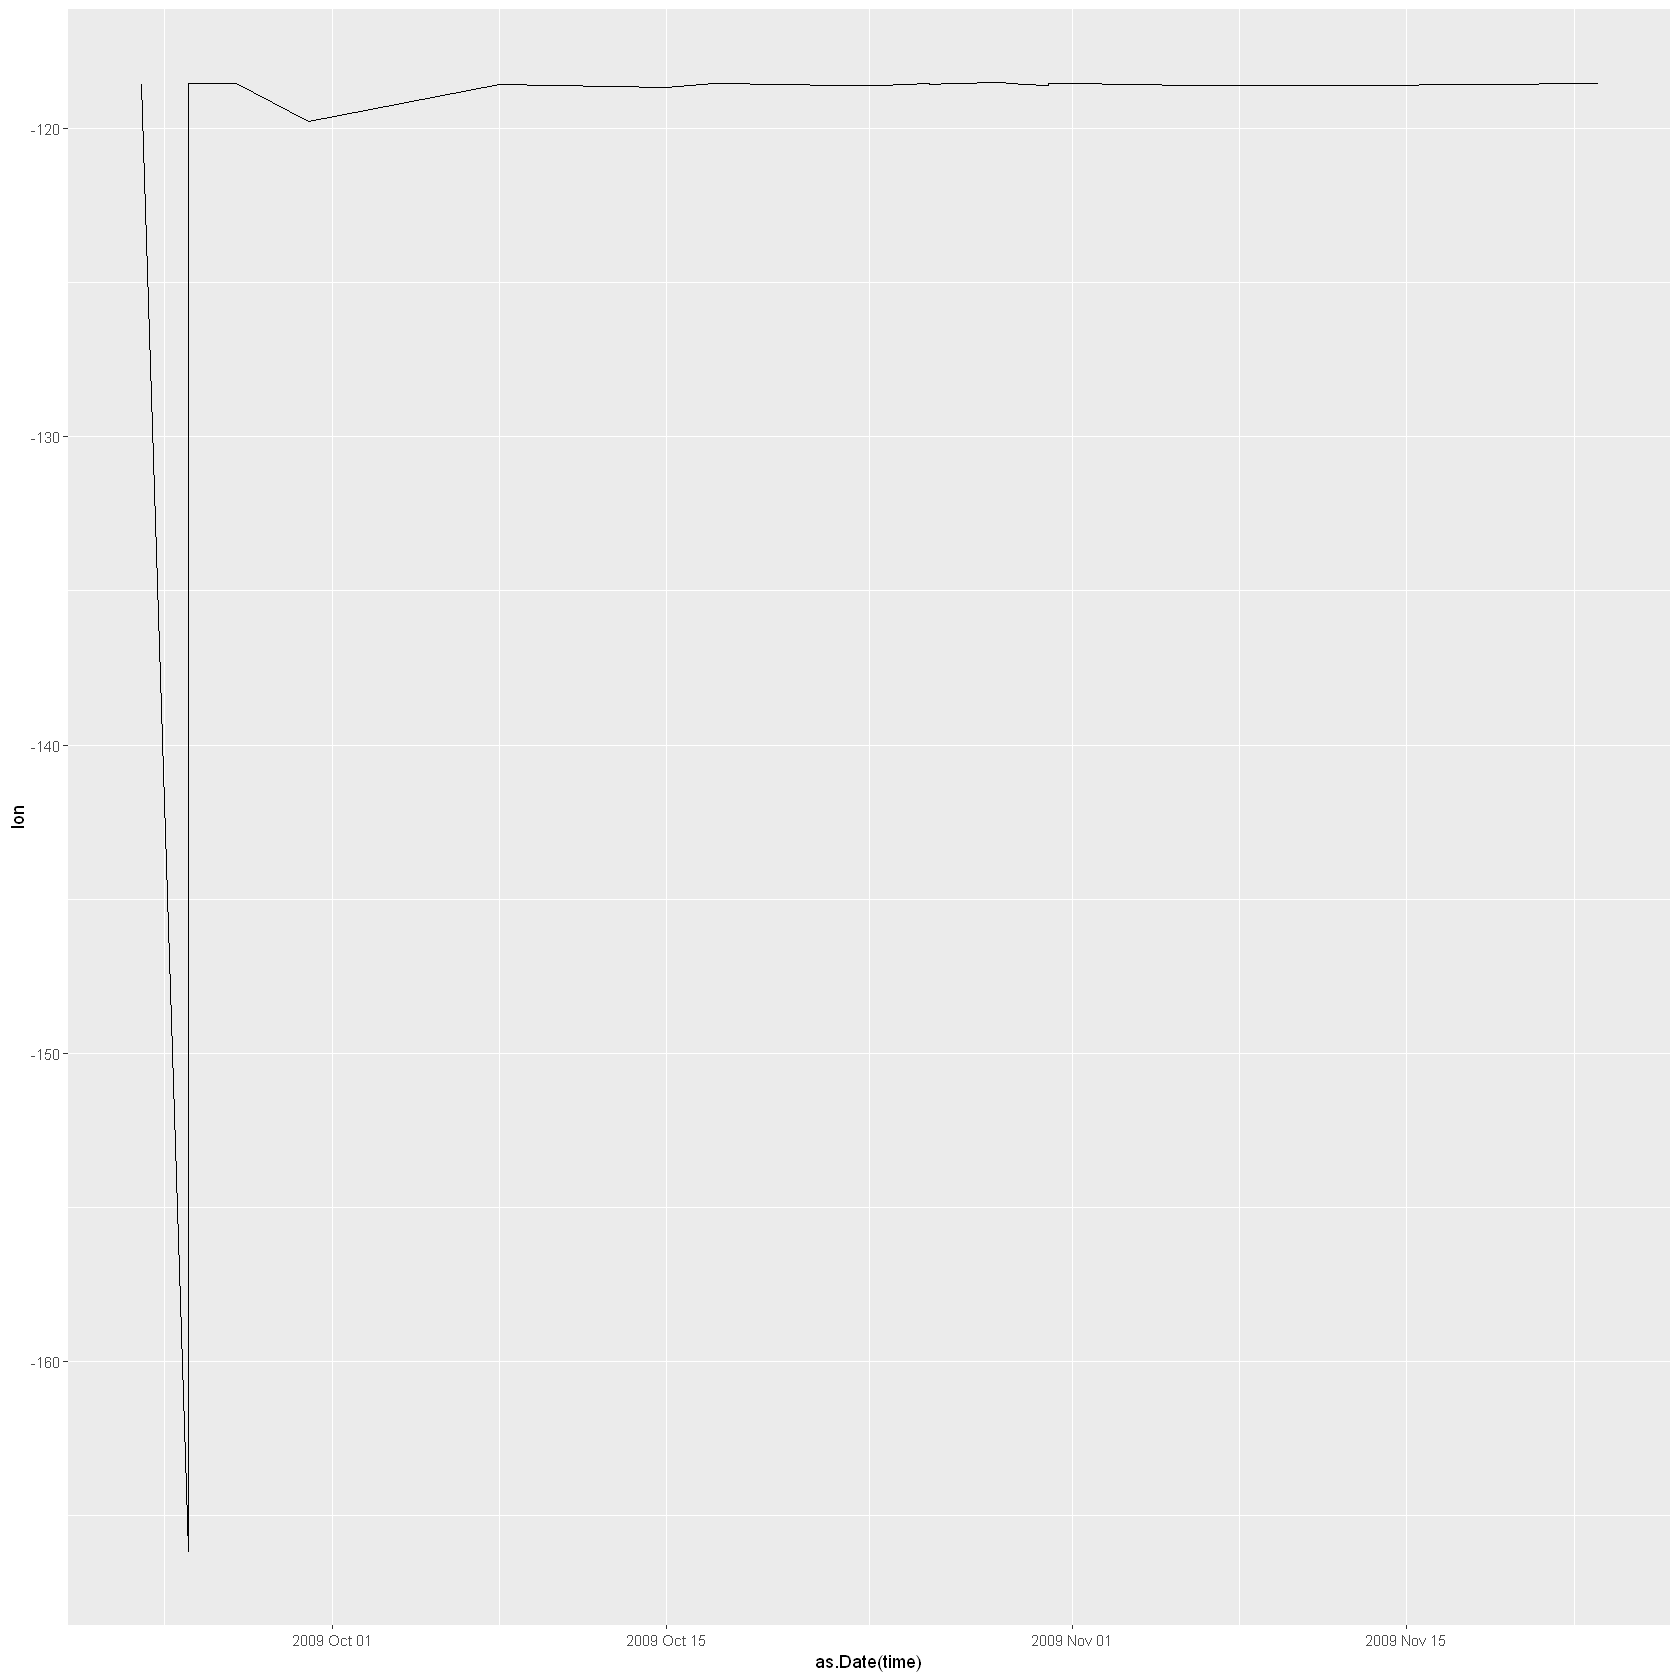

In [10]:
#library(ggplot2) - loaded with tidyverse

options(repr.plot.width = 14, repr.plot.height = 14)

ggplot(atn_tbl, aes(x=as.Date(time), y=lon)) + 
    geom_line() + 
    scale_x_date(date_labels = "%Y %b %d")

## Making a map

Next, let's make a map of the locations of this animal with the colors dependent on time.

Use the global attribute `title` as the title of the plot.

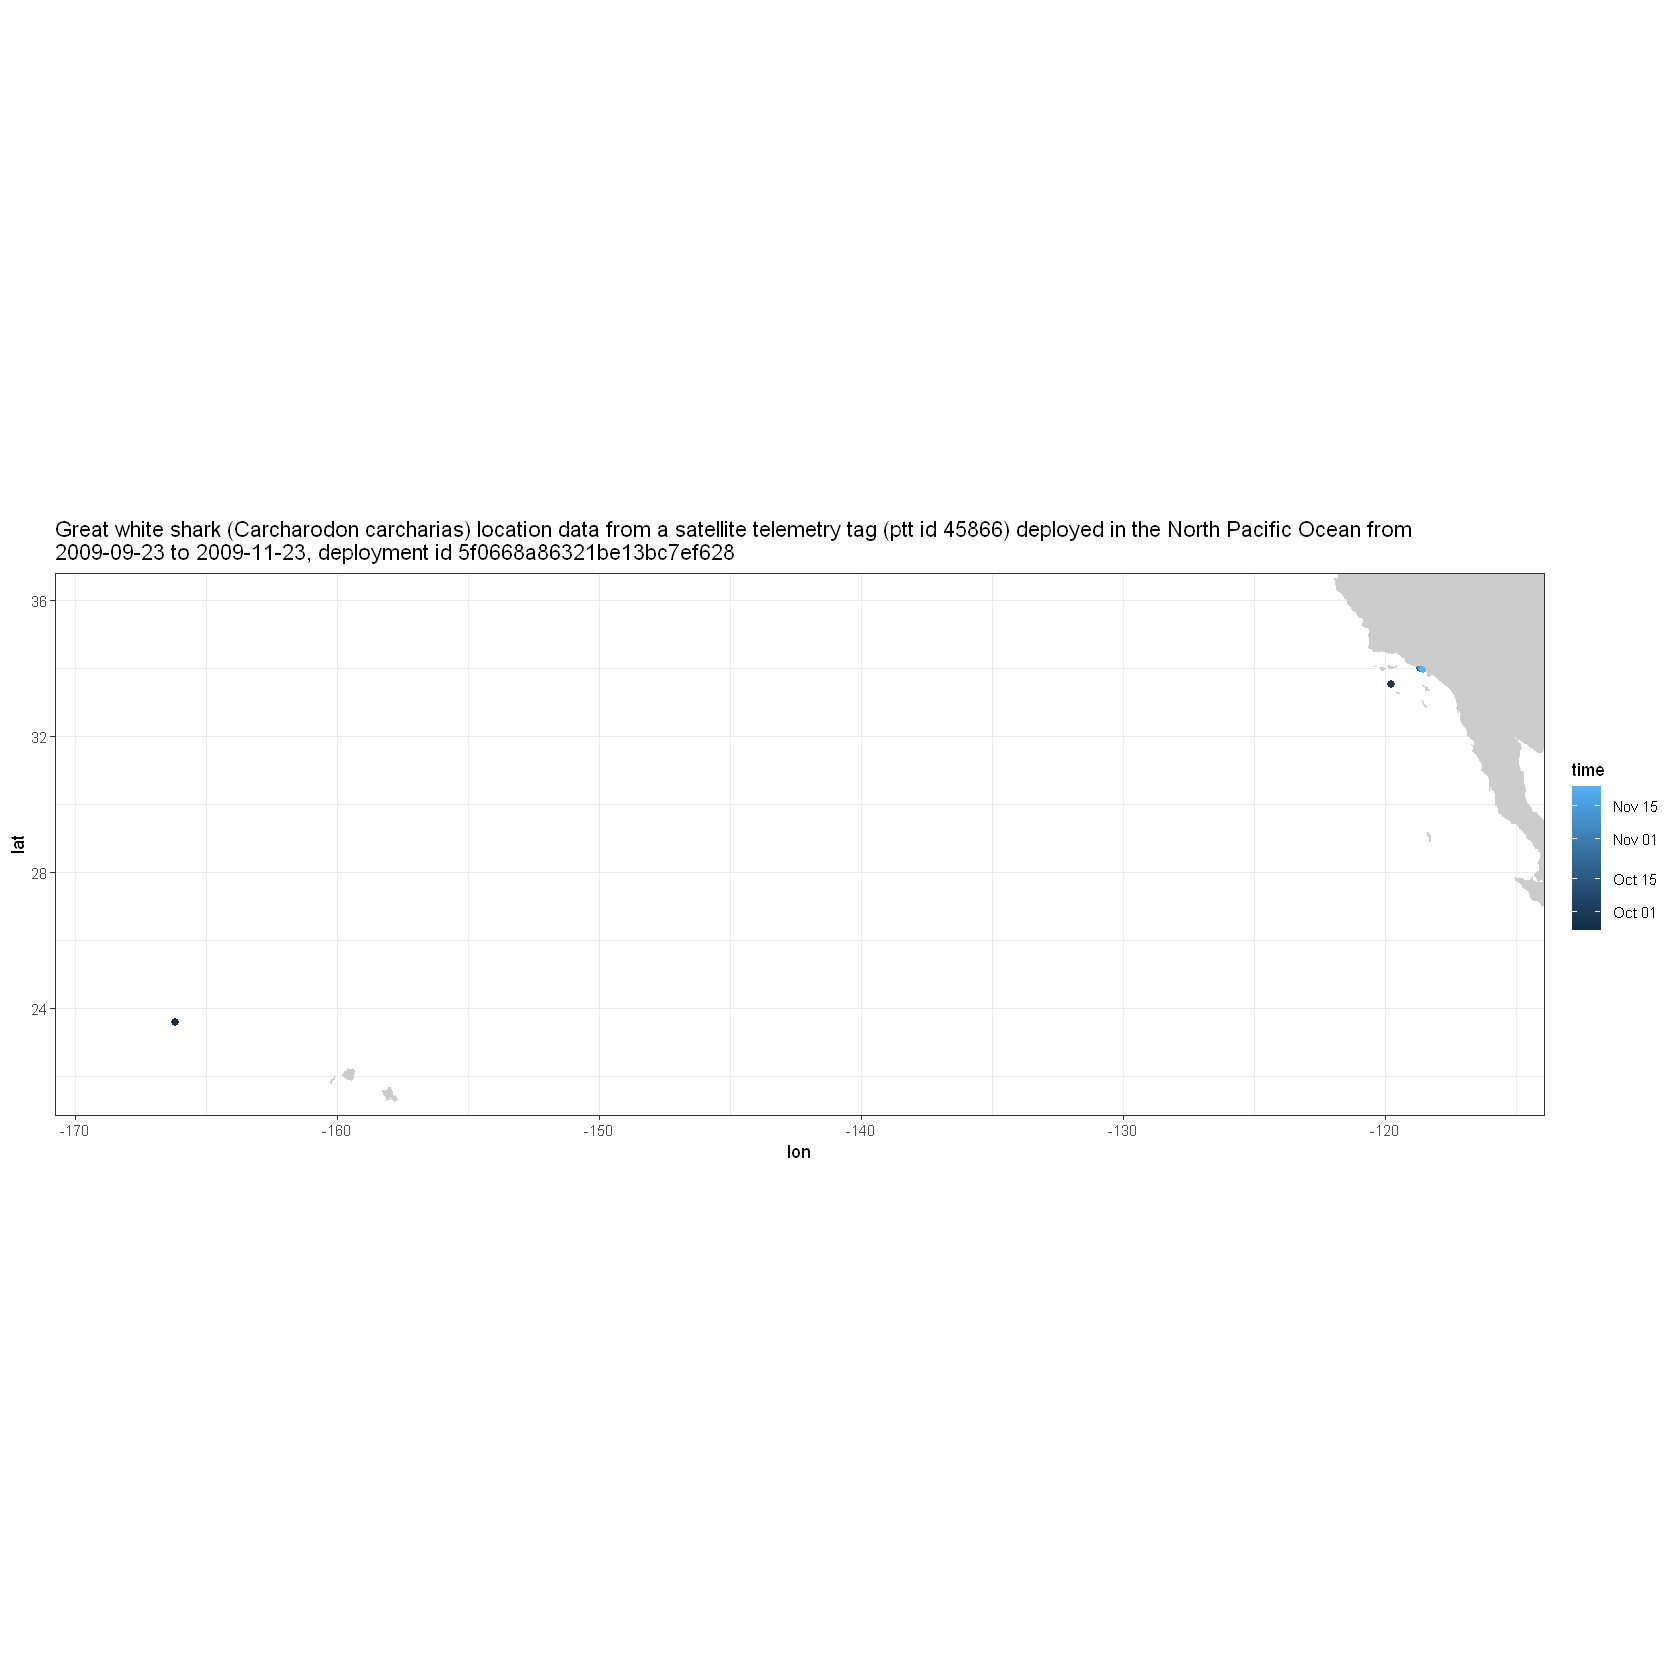

In [11]:
# library('maps') - moved to top so it's clear they should be installed from the beginning
# library('mapdata')

# collect title from global attributes
title <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "title")


# Map limits.
ylim <- c( min(atn_tbl$lat)-2, max(atn_tbl$lat)+2 )
xlim <- c( min(atn_tbl$lon)-2, max(atn_tbl$lon)+2 )

# Get outline data for map.
w <- map_data( 'worldHires', ylim = ylim, xlim = xlim )

z <- ggplot(atn_tbl, aes( x = lon, y = lat )) +
     geom_point( aes(colour = time), size = 2.0) +
     scale_shape_manual( values = c(19, 1) )

z + geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = 'grey80') + 
    theme_bw() +
    coord_fixed(1.3, xlim = xlim, ylim = ylim) + 
    #ggtitle( paste( strwrap(title$value, width = 150), collapse = "\n") ) - labs is a more mature and flexible function
    labs(title = paste( strwrap(title$value, width = 150), collapse = "\n"))

---
# Converting to Darwin Core

Now let's work through converting this netCDF file to Darwin Core. Following the guidance published at https://github.com/tdwg/dwc-for-biologging/wiki/Data-guidelines and https://github.com/ocean-tracking-network/biologging_standardization/tree/master/examples/braun-blueshark/darwincore-example

Luckily we've already done the mappings in [this spreadsheet](https://docs.google.com/spreadsheets/d/12pP4IY2oXFhkXvOePtizHnShhlmO0r7QOTxu5ETvNOA/edit#gid=0).

## Occurrence Core

Below is the mapping table from DarwinCore to the netCDF file. 

DarwinCore Term | Status | netCDF source
----------------|--------|--------------
occurrenceStatus | Required | hardcoded to `present`.
basisOfRecord | Required | data contained in the `type` variable where `type` of `User` = `HumanObservation` and `Argos` = `MachineObservation`.
occurrenceID | Required | `eventDate`, plus data contained in `z` variable, plus `animal_common_name` global attribute.
organismID | Required | `platform_id` global attribute plus the `animal_common_name` global attribute.
eventDate | Required | data contained in `time` variable. Converted to ISO8601.
decimalLatitude & decimalLongitude | Required | data in `lat` and `lon` variable, respectively.
geodeticDatum | Required | attribute `epsg_code` in the `crs` variable.
scientificName | Required | data from the variable `taxon_name`.
scientificNameID | data from the variable `taxon_lsid`.
eventID | Strongly recommended | `animal_common_name` global attribute plus the `eventDate`.
samplingProtocol | Strongly recommended | 
kingdom | Strongly recommended | `kingdom` attribute in the `animal` variable.
taxonRank | Strongly recommended | `rank` attribute in the `animal` variable.
coordinateUncertaintyInMeters | Share if available | maximum value of the data from the variables `error_radius`, `semi_major_axis`, and `offset`.
lifeStage | Share if available | data from the variable `animal_life_stage`.
sex | Share if available | data from the variable `animal_sex`.

Collect the global attributes from the metadata to use in populating some of these fields.

In [12]:
options(repr.matrix.max.rows=91)

globals <- metadata %>% dplyr::filter(variable == "NC_GLOBAL")

str(globals)

tibble [89 x 4] (S3: tbl_df/tbl/data.frame)
 $ id      : int [1:89] 0 1 2 3 4 5 6 7 8 9 ...
 $ name    : chr [1:89] "date_created" "featureType" "cdm_data_type" "Conventions" ...
 $ variable: chr [1:89] "NC_GLOBAL" "NC_GLOBAL" "NC_GLOBAL" "NC_GLOBAL" ...
 $ value   :List of 89
  ..$ date_created               : chr "2023-08-16T20:00:00Z"
  ..$ featureType                : chr "trajectory"
  ..$ cdm_data_type              : chr "Trajectory"
  ..$ Conventions                : chr "CF-1.10, ACDD-1.3, IOOS-1.2"
  ..$ argos_program_number       : chr "2414"
  ..$ creator_email              : chr "chris.lowe@csulb.edu"
  ..$ id                         : chr "5f0668a86321be13bc7ef628"
  ..$ tag_type                   : chr "SPOT5"
  ..$ source                     : chr "Service Argos"
  ..$ acknowledgement            : chr "NOAA IOOS, Axiom Data Science, Navy ONR, NOAA NMFS, Wildlife Computers, Argos, IOOS ATN"
  ..$ creator_name               : chr "Chris G. Lowe"
  ..$ creator_url          

## Look at the raw data table

In [13]:
atn_tbl

time,z,lat,lon,ptt,instrument,type,location_class,error_radius,semi_major_axis,semi_minor_axis,ellipse_orientation,offset,offset_orientation,gpe_msd,gpe_u,count,qartod_time_flag,qartod_speed_flag,qartod_location_flag,qartod_rollup_flag,comment,obs
<dttm>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
2009-09-23 00:00:00,0,34.030,-118.560,45866,SPOT,User,nan,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,2,1,1,,1
2009-09-25 06:42:00,0,23.590,-166.180,45866,SPOT,Argos,A,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,4,1,4,,2
2009-09-25 11:09:00,0,34.024,-118.556,45866,SPOT,Argos,1,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,4,1,4,,3
2009-09-25 11:11:00,0,34.035,-118.549,45866,SPOT,Argos,0,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,4,1,4,,4
2009-09-27 17:58:00,0,34.033,-118.547,45866,SPOT,Argos,1,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,1,1,1,,5
2009-09-30 05:01:00,0,33.517,-119.750,45866,SPOT,Argos,B,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,1,1,1,,6
2009-10-08 20:24:00,0,34.038,-118.581,45866,SPOT,Argos,2,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,1,1,1,,7
2009-10-15 11:05:00,0,33.995,-118.678,45866,SPOT,Argos,0,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,1,1,1,,8
2009-10-17 06:11:00,0,34.037,-118.545,45866,SPOT,Argos,0,NA,NA,NA,NA,NA,NA,NaN,NaN,NA,1,1,1,1,,9


Now start working through the crosswalk. A few thoughts about some of the functions we use:

1. `case_when` is a [function from dplyr](https://dplyr.tidyverse.org/reference/case_when.html) that is essentially a 'vectorized' ifelse function.  The take-home is that it plays nice with other `tidyverse` functions, like `mutate` and IMO is a bit more readable than a complex ifelse statement.
2. `rename` is another nice dplyr function for renaming columns. It workes well following `mutate` because you can see the mutation applied to a column and then the column renamed, rather than a complex creation of a new column and dropping of the old column.

In [14]:
# Defined to grab attributes in subsequent code
nc <- nc_open(fname)

occurrencedf <- atn_tbl %>%  
    select( # Select desired columns
        
        time, 
        lat,
        lon,
        type,
        location_class,
        qartod_time_flag,
        qartod_speed_flag,
        qartod_location_flag,
        qartod_rollup_flag
        
          ) %>%
    mutate( # add and mutate columns.
        
        type = case_when(type == 'User' ~ 'HumanObservation',
                         type == 'Argos' ~ 'MachineObservation'),
        
        time = format(time, '%Y-%m-%dT%H:%M:%SZ'),
        
        kingdom = metadata %>% dplyr::filter(variable == "animal" & name == "kingdom") %>% pull(value) %>% unlist(use.names = FALSE),
        
        taxonRank = metadata %>% dplyr::filter(variable == "animal" & name == "rank") %>% pull(value) %>% unlist(use.names = FALSE),
        
        occurrenceStatus = "present",
        
        sex = ncvar_get( nc, 'animal_sex'),
        
        lifeStage = ncvar_get( nc, 'animal_life_stage'),
        
        scientificName = ncvar_get( nc, 'taxon_name'),
        
        scientificNameID = ncvar_get( nc, "taxon_lsid")
        
        ) %>%

    rename(  # rename columns to Darwin Core terms
        
        basisOfRecord = type,
        eventDate = time,
        decimalLatitude = lat,
        decimalLongitude = lon) %>% 

    arrange(eventDate) #arrange by increasing date

# minimumDepthInMeters = z,
occurrencedf$minimumDepthInMeters = atn_tbl$z

# maximumDepthInMeters = z,
occurrencedf$maximumDepthInMeters = atn_tbl$z

# organismID - {platformID}_{common_name}
common_name_tbl <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "animal_common_name")
common_name <- chartr(" ", "_", common_name_tbl$value)
platform_id_tbl <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "platform_id")
platform_id <- chartr(" ", "_", platform_id_tbl$value)
occurrencedf$organismID <- paste(platform_id , common_name, sep = "_") 

# occurrenceID - {eventDate}_{depth}_{common_name}
occurrencedf$occurrenceID <- sub(" ", "_", paste(occurrencedf$eventDate, atn_tbl$z, common_name, sep = "_"))

# geodeticDatum
gd_tbl <- metadata %>% dplyr::filter(variable == "crs") %>% dplyr::filter(name == "epsg_code")
occurrencedf$geodeticDatum <- paste(gd_tbl$value)

# eventID
#eventID - {common_name}_{dateTime}
cname = metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "animal_common_name")
occurrencedf$eventID <- sub(" ", "_", paste0(cname$value, "_", occurrencedf$eventDate))

head(occurrencedf, n=2)

eventDate,decimalLatitude,decimalLongitude,basisOfRecord,location_class,qartod_time_flag,qartod_speed_flag,qartod_location_flag,qartod_rollup_flag,kingdom,taxonRank,occurrenceStatus,sex,lifeStage,scientificName,scientificNameID,minimumDepthInMeters,maximumDepthInMeters,organismID,occurrenceID,geodeticDatum,eventID
<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
2009-09-23T00:00:00Z,34.03,-118.56,HumanObservation,nan,1,2,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-23T00:00:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-23T00:00:00Z
2009-09-25T06:42:00Z,23.59,-166.18,MachineObservation,A,1,4,1,4,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-25T06:42:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-25T06:42:00Z


In [15]:
str(occurrencedf)

tibble [29 x 22] (S3: tbl_df/tbl/data.frame)
 $ eventDate           : chr [1:29] "2009-09-23T00:00:00Z" "2009-09-25T06:42:00Z" "2009-09-25T11:09:00Z" "2009-09-25T11:11:00Z" ...
 $ decimalLatitude     : num [1:29] 34 23.6 34 34 34 ...
 $ decimalLongitude    : num [1:29] -119 -166 -119 -119 -119 ...
 $ basisOfRecord       : chr [1:29] "HumanObservation" "MachineObservation" "MachineObservation" "MachineObservation" ...
 $ location_class      : chr [1:29] "nan" "A" "1" "0" ...
 $ qartod_time_flag    : int [1:29] 1 1 1 1 1 1 1 1 1 1 ...
 $ qartod_speed_flag   : int [1:29] 2 4 4 4 1 1 1 1 1 1 ...
 $ qartod_location_flag: int [1:29] 1 1 1 1 1 1 1 1 1 1 ...
 $ qartod_rollup_flag  : int [1:29] 1 4 4 4 1 1 1 1 1 1 ...
 $ kingdom             : chr [1:29] "Animalia" "Animalia" "Animalia" "Animalia" ...
 $ taxonRank           : chr [1:29] "Species" "Species" "Species" "Species" ...
 $ occurrenceStatus    : chr [1:29] "present" "present" "present" "present" ...
 $ sex                 : chr [1:29] "

## Add coordinateUncertaintyInMeters AND filter by location_class

When we add `coordinateUncertaintyInMeters` we are also filtering out where `location_class` == `A`,`B`,or `Z`.

In these data we also have additional information about the Location Quality Code from ARGOS satellite system. Below are the codes and those meanings.

code_values | code meanings
------------|--------------
G | estimated error less than 100m and 1+ messages received per satellite pass
3 | estimated error less than 250m and 4+ messages received per satellite pass
2 | estimated error between 250m and 500m and 4+ messages per satellite pass
1 | estimated error between 500m and 1500m and 4+ messages per satellite pass
0 | estimated error greater than 1500m and 4+ messages received per satellite pass
A | no least squares estimated error or unbounded kalman filter estimated error and 3 messages received per satellite pass
B | no least squares estimated error or unbounded kalman filter estimated error and 1 or 2 messages received per satellite pass
Z | invalid location (available for Service Plus or Auxilliary Location Processing)

Since codes `A`, `B`, and `Z` are essentially bad values, I propose that we filter those out.

Also, create a mapping table for `coordinateUncertaintyInMeters` that corresponds to the ARGOS code maximum error as shown in the table below:

code | coordinateUncertaintyInMeters
-----|------------------------------
G | 100
3 | 250
2 | 500
1 | 1500
0 | 10000 ([ref](https://github.com/ioos/bio_data_guide/issues/145#issuecomment-1805739244))

Below we create a lookup table for the `location_class` values we agree are good, which contains the `coordinateUncertaintyInMeters` for the appropriate location class. When we merge that table with our raw data, the observations that don't match the location_classes in our lookup table will not be transfered over (ie. they will be filtered out). 

In [16]:
occurrencedf <- occurrencedf %>%
    filter(location_class %in% c('nan','G','3','2','1','0')) %>%
    mutate(  # This returns NA for any other values than those defined below
        coordinateUncertaintyInMeters = case_when(location_class == 'nan' ~ 0,
                                                     location_class == 'G' ~ 200,
                                                     location_class == '3' ~ 250,
                                                     location_class == '2' ~ 500,
                                                     location_class == '1' ~ 1500,
                                                     location_class == '0' ~ 10000) # https://github.com/ioos/bio_data_guide/issues/145#issuecomment-1805739244
          ) %>% 
    arrange(eventDate) # arrange by increasing date


occurrencedf

eventDate,decimalLatitude,decimalLongitude,basisOfRecord,location_class,qartod_time_flag,qartod_speed_flag,qartod_location_flag,qartod_rollup_flag,kingdom,taxonRank,occurrenceStatus,sex,lifeStage,scientificName,scientificNameID,minimumDepthInMeters,maximumDepthInMeters,organismID,occurrenceID,geodeticDatum,eventID,coordinateUncertaintyInMeters
<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
2009-09-23T00:00:00Z,34.030,-118.560,HumanObservation,nan,1,2,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-23T00:00:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-23T00:00:00Z,0
2009-09-25T11:09:00Z,34.024,-118.556,MachineObservation,1,1,4,1,4,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-25T11:09:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-25T11:09:00Z,1500
2009-09-25T11:11:00Z,34.035,-118.549,MachineObservation,0,1,4,1,4,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-25T11:11:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-25T11:11:00Z,10000
2009-09-27T17:58:00Z,34.033,-118.547,MachineObservation,1,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-27T17:58:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-27T17:58:00Z,1500
2009-10-08T20:24:00Z,34.038,-118.581,MachineObservation,2,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-08T20:24:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-08T20:24:00Z,500
2009-10-15T11:05:00Z,33.995,-118.678,MachineObservation,0,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-15T11:05:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-15T11:05:00Z,10000
2009-10-17T06:11:00Z,34.037,-118.545,MachineObservation,0,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T06:11:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T06:11:00Z,10000
2009-10-17T09:00:00Z,34.026,-118.534,MachineObservation,2,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T09:00:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T09:00:00Z,500
2009-10-17T10:38:00Z,34.027,-118.545,MachineObservation,3,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T10:38:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T10:38:00Z,250


Notice how we went from 29 rows down to 19 rows by only selecting specific the location_class.

## Create a dataGeneralizations column to describe how many duplicates were found for each deprecation series

Add a `dataGeneralizations` column containing a string like 'first of # records' to indicate there are more records in the raw dataset to be discovered by the super-curious.

The dataGeneralizations string is compiled by counting the number of consecutive duplicates and inserting that into a standard string. That string is "first of [n] records" which will make more sense once we've filtered down to keep the first occurrence of the hour.

The next step below this, we filter out only the first observation of the hour.

In [17]:
# library(lubridate) - loaded above

# sort by date
occurrencedf <- occurrencedf %>% arrange(eventDate)

# create column of date to the hour which will be our decimation strategy
# occurrencedf$eventDateHrs <- format(as.POSIXct(occurrencedf$eventDate, format="%Y-%m-%dT%H:%M:%SZ"),"%Y-%m-%dT%H")

#occurrencedf <- occurrencedf %>%
#    add_count(eventDateHrs)

# create dataGeneralizations string
# occurrencedf$dataGeneralizations <-  paste("first of ", occurrencedf$n ,"records")

# occurrencedf["dataGeneralizations"][occurrencedf["n"] == 1] <- ""

# remove n column

# occurrencedf$n <- NULL

# I think using tidy syntax here makes it a little more readable

occurrencedf <- occurrencedf %>%
    mutate(eventDateHrs = format(as.POSIXct(eventDate, format="%Y-%m-%dT%H:%M:%SZ"),"%Y-%m-%dT%H")
           ) %>%
    add_count(eventDateHrs) %>%
    mutate(dataGeneralizations = case_when(n == 1 ~ "",
                                           TRUE ~ paste("first of ", n ,"records")
                                           )
           ) %>%
    select(-n)



occurrencedf

eventDate,decimalLatitude,decimalLongitude,basisOfRecord,location_class,qartod_time_flag,qartod_speed_flag,qartod_location_flag,qartod_rollup_flag,kingdom,taxonRank,occurrenceStatus,sex,lifeStage,scientificName,scientificNameID,minimumDepthInMeters,maximumDepthInMeters,organismID,occurrenceID,geodeticDatum,eventID,coordinateUncertaintyInMeters,eventDateHrs,dataGeneralizations
<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
2009-09-23T00:00:00Z,34.030,-118.560,HumanObservation,nan,1,2,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-23T00:00:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-23T00:00:00Z,0,2009-09-23T00,
2009-09-25T11:09:00Z,34.024,-118.556,MachineObservation,1,1,4,1,4,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-25T11:09:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-25T11:09:00Z,1500,2009-09-25T11,first of 2 records
2009-09-25T11:11:00Z,34.035,-118.549,MachineObservation,0,1,4,1,4,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-25T11:11:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-25T11:11:00Z,10000,2009-09-25T11,first of 2 records
2009-09-27T17:58:00Z,34.033,-118.547,MachineObservation,1,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-27T17:58:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-27T17:58:00Z,1500,2009-09-27T17,
2009-10-08T20:24:00Z,34.038,-118.581,MachineObservation,2,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-08T20:24:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-08T20:24:00Z,500,2009-10-08T20,
2009-10-15T11:05:00Z,33.995,-118.678,MachineObservation,0,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-15T11:05:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-15T11:05:00Z,10000,2009-10-15T11,
2009-10-17T06:11:00Z,34.037,-118.545,MachineObservation,0,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T06:11:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T06:11:00Z,10000,2009-10-17T06,
2009-10-17T09:00:00Z,34.026,-118.534,MachineObservation,2,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T09:00:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T09:00:00Z,500,2009-10-17T09,
2009-10-17T10:38:00Z,34.027,-118.545,MachineObservation,3,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T10:38:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T10:38:00Z,250,2009-10-17T10,


## Decimate occurrences down to the first detection/location per hour

Here we've done the decimation in Python: https://gist.github.com/MathewBiddle/d434ac2b538b2728aa80c6a7945f94be

Essentially we build a new colum that is the date plus the two digit hour. Then we find where that column has duplicates and keep the first entry.

In R, we do something slightly different as we only keep the distinct (ie. unique) rows and if there are duplicates, pick the first row of the duplicate.

In [18]:
# library(lubridate) - loaded above

# sort by date
occurrencedf_dec <- occurrencedf %>% arrange(eventDate)

# create column of date to the hour which will be our decimation strategy
# occurrencedf_dec$eventDateHrs <- format(as.POSIXct(occurrencedf_dec$eventDate, format="%Y-%m-%dT%H:%M:%SZ"),"%Y-%m-%dT%H")

# occurrencedf %>% duplicated(occurrencedf$eventDateHrs)

# filter table to only unique date + hour and pick the first row.
occurrencedf_dec <- distinct(occurrencedf_dec,eventDateHrs,.keep_all = TRUE) %>%
    select(-eventDateHrs)

# occurrencedf_dec$eventDateHrs <- NULL - added as pipe above

occurrencedf_dec

eventDate,decimalLatitude,decimalLongitude,basisOfRecord,location_class,qartod_time_flag,qartod_speed_flag,qartod_location_flag,qartod_rollup_flag,kingdom,taxonRank,occurrenceStatus,sex,lifeStage,scientificName,scientificNameID,minimumDepthInMeters,maximumDepthInMeters,organismID,occurrenceID,geodeticDatum,eventID,coordinateUncertaintyInMeters,dataGeneralizations
<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
2009-09-23T00:00:00Z,34.030,-118.560,HumanObservation,nan,1,2,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-23T00:00:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-23T00:00:00Z,0,
2009-09-25T11:09:00Z,34.024,-118.556,MachineObservation,1,1,4,1,4,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-25T11:09:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-25T11:09:00Z,1500,first of 2 records
2009-09-27T17:58:00Z,34.033,-118.547,MachineObservation,1,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-27T17:58:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-27T17:58:00Z,1500,
2009-10-08T20:24:00Z,34.038,-118.581,MachineObservation,2,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-08T20:24:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-08T20:24:00Z,500,
2009-10-15T11:05:00Z,33.995,-118.678,MachineObservation,0,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-15T11:05:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-15T11:05:00Z,10000,
2009-10-17T06:11:00Z,34.037,-118.545,MachineObservation,0,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T06:11:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T06:11:00Z,10000,
2009-10-17T09:00:00Z,34.026,-118.534,MachineObservation,2,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T09:00:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T09:00:00Z,500,
2009-10-17T10:38:00Z,34.027,-118.545,MachineObservation,3,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T10:38:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T10:38:00Z,250,
2009-10-18T08:48:00Z,34.039,-118.548,MachineObservation,1,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-18T08:48:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-18T08:48:00Z,1500,


Notice that we have gone from 19 rows to 17 rows. Removing rows observed on `2009-09-25T11:11:00Z` and `2009-10-27T16:22:00Z` as they were the second points within that specifc hour.

## Filter on QARTOD flags?

We also have QARTOD flags and they are as follows:

value | meaning
------|--------
1 | PASS
2 | NOT_EVALUATED
3 | SUSPECT
4 | FAIL
9 | MISSING

The QARTOD tests are:

variable | long_name
---------|----------
qartod_time_flag | Time QC test - gross range test
qartod_speed_flag | Speed QC test - gross range test
qartod_location_flag | Location QC test - Location test
qartod_rollup_flag | Aggregate QC value

I'm not sure what to do here. My preference would be to include all rows where `qartod_rollup_flag` == 1 and drop the rest. But I'm open to suggestions.

In [19]:
# perform filter but don't save it.
filter(occurrencedf_dec, qartod_rollup_flag == 1)

#occurrencedf_dec <- filter(occurrencedf_dec, atn_tbl.qartod_rollup_flag == 1)

#occurrencedf_dec

eventDate,decimalLatitude,decimalLongitude,basisOfRecord,location_class,qartod_time_flag,qartod_speed_flag,qartod_location_flag,qartod_rollup_flag,kingdom,taxonRank,occurrenceStatus,sex,lifeStage,scientificName,scientificNameID,minimumDepthInMeters,maximumDepthInMeters,organismID,occurrenceID,geodeticDatum,eventID,coordinateUncertaintyInMeters,dataGeneralizations
<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
2009-09-23T00:00:00Z,34.030,-118.560,HumanObservation,nan,1,2,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-23T00:00:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-23T00:00:00Z,0,
2009-09-27T17:58:00Z,34.033,-118.547,MachineObservation,1,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-09-27T17:58:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-09-27T17:58:00Z,1500,
2009-10-08T20:24:00Z,34.038,-118.581,MachineObservation,2,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-08T20:24:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-08T20:24:00Z,500,
2009-10-15T11:05:00Z,33.995,-118.678,MachineObservation,0,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-15T11:05:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-15T11:05:00Z,10000,
2009-10-17T06:11:00Z,34.037,-118.545,MachineObservation,0,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T06:11:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T06:11:00Z,10000,
2009-10-17T09:00:00Z,34.026,-118.534,MachineObservation,2,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T09:00:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T09:00:00Z,500,
2009-10-17T10:38:00Z,34.027,-118.545,MachineObservation,3,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-17T10:38:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-17T10:38:00Z,250,
2009-10-18T08:48:00Z,34.039,-118.548,MachineObservation,1,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-18T08:48:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-18T08:48:00Z,1500,
2009-10-18T10:26:00Z,34.031,-118.541,MachineObservation,2,1,1,1,1,Animalia,Species,present,male,juvenile,Carcharodon carcharias,urn:lsid:marinespecies.org:taxname:105838,0,0,105838_great_white_shark,2009-10-18T10:26:00Z_0_great_white_shark,EPSG:4326,great_white shark_2009-10-18T10:26:00Z,500,


# Create an updated map to see what's changed.

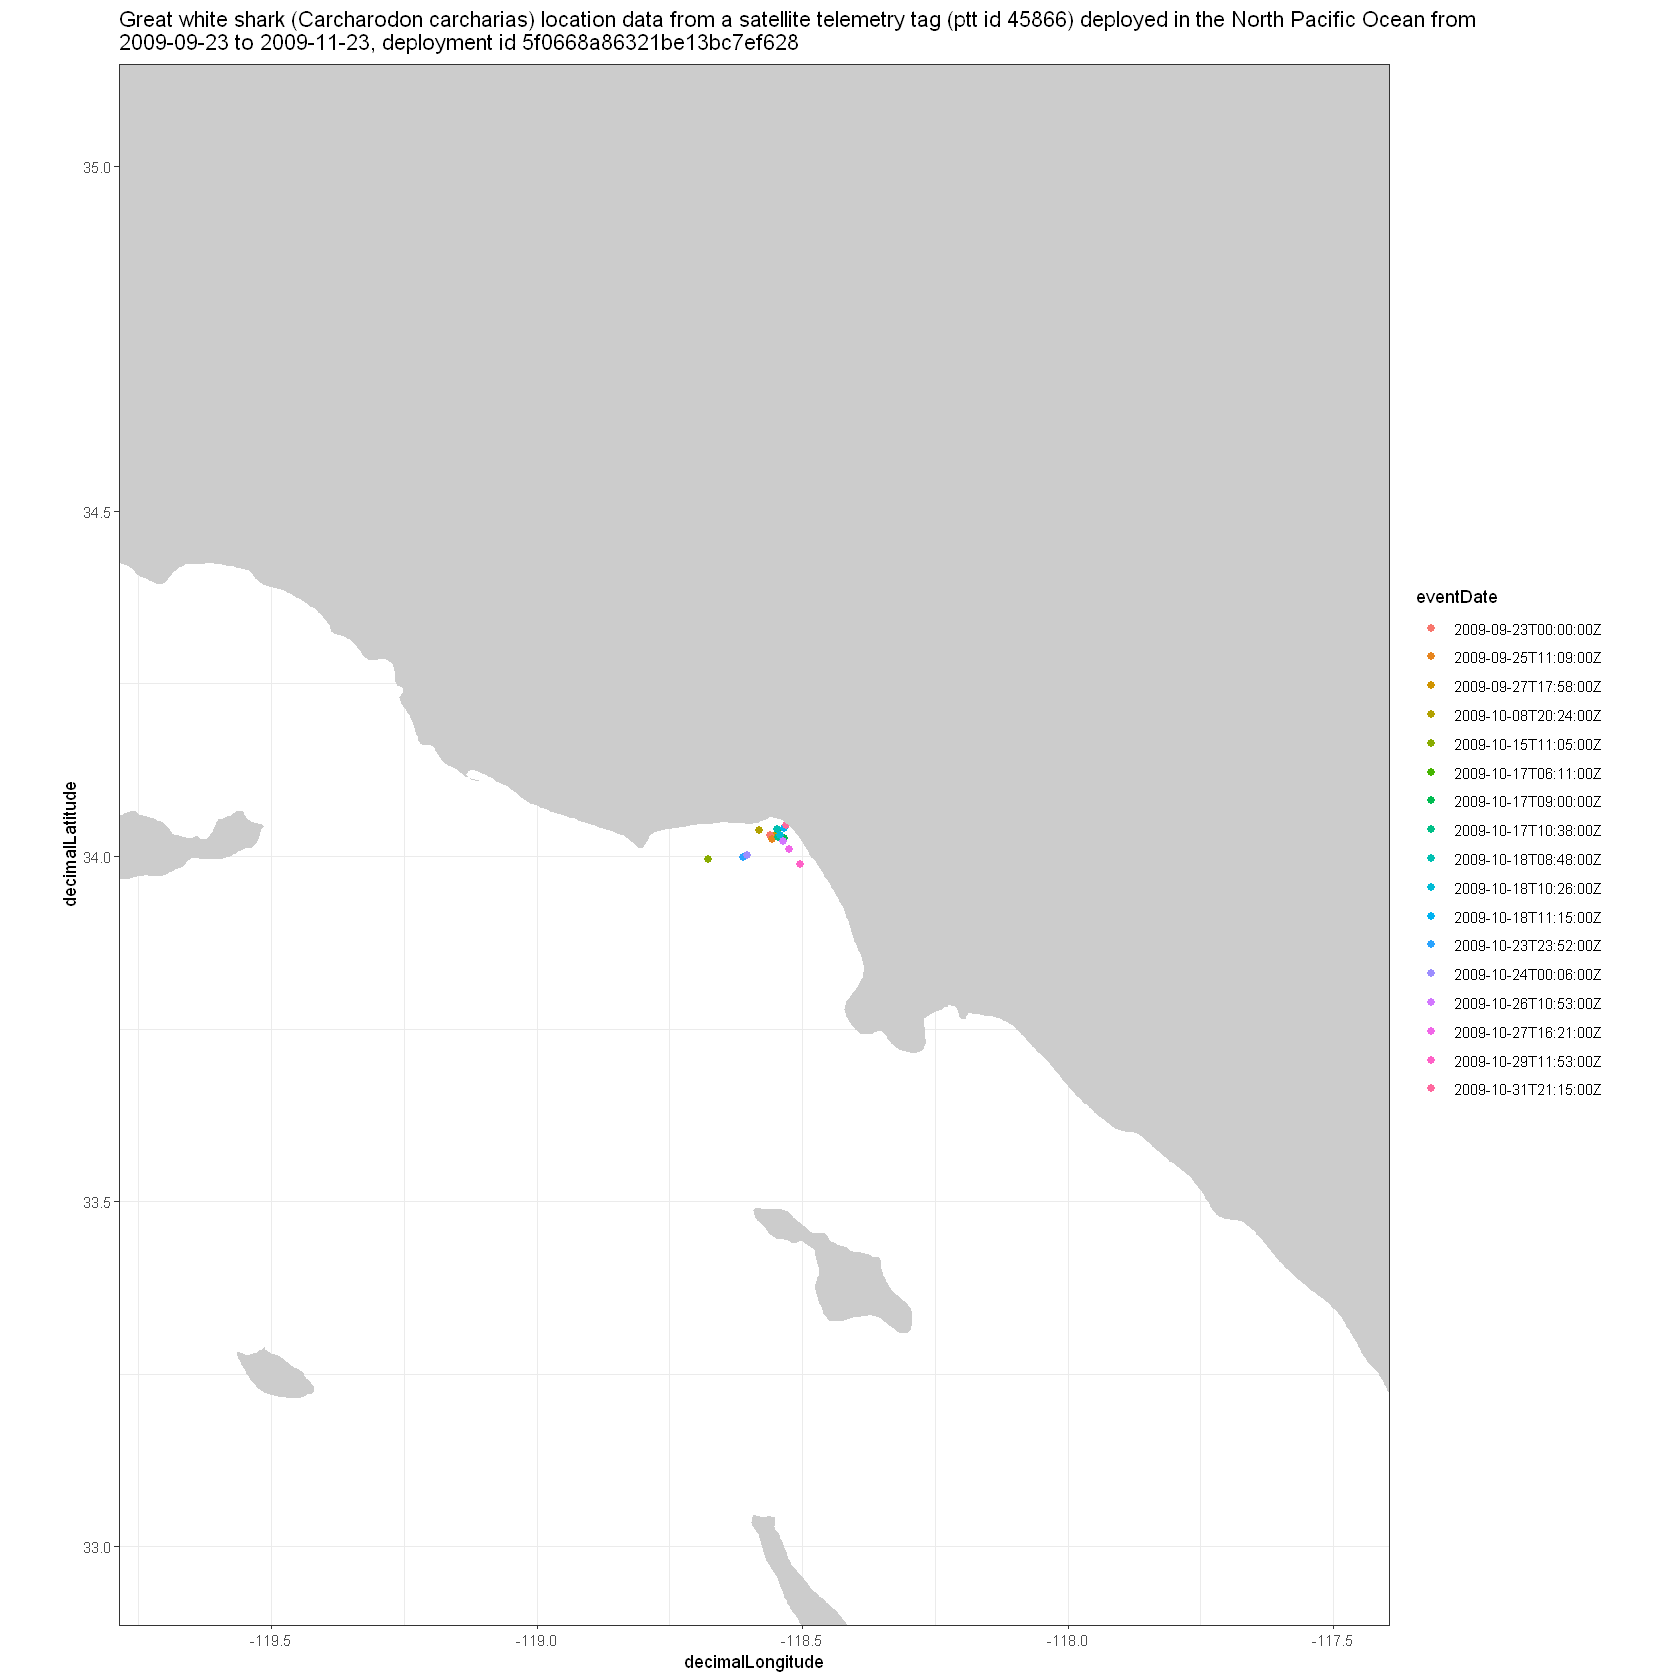

In [20]:
# library('maps') - loaded up top
# library('mapdata')

# collect title from global attributes
title <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "title")


# Map limits.
ylim <- c( min(occurrencedf_dec$decimalLatitude)-1, max(occurrencedf_dec$decimalLatitude)+1 )
xlim <- c( min(occurrencedf_dec$decimalLongitude)-1, max(occurrencedf_dec$decimalLongitude)+1 )

# Get outline data for map.
w <- map_data( 'worldHires', ylim = ylim, xlim = xlim )

z <- ggplot(occurrencedf_dec, aes( x = decimalLongitude, y = decimalLatitude )) +
     geom_point( aes(colour = eventDate), size = 2.0) +  #SF: because of the changes I made above, eventDate is being seen as continuous here. Not sure if that's a problem.
     scale_shape_manual( values = c(19, 1) )

z + geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = 'grey80') + 
    theme_bw() +
    coord_fixed(1.3, xlim = xlim, ylim = ylim) + 
    #ggtitle( paste( strwrap(title$value, width = 150), collapse = "\n") ) - labs is a more mature and flexible function
    labs(title = paste( strwrap(title$value, width = 150), collapse = "\n"))

Drop the quality flag columns to align with DarwinCore standard.

In [21]:
#occurrencedf_dec$atn_tbl.location_class <- NULL
#occurrencedf_dec$atn_tbl.qartod_time_flag <- NULL
#occurrencedf_dec$atn_tbl.qartod_speed_flag <- NULL
#occurrencedf_dec$atn_tbl.qartod_location_flag <- NULL
#occurrencedf_dec$atn_tbl.qartod_rollup_flag <- NULL

occurrencedf_dec <- occurrencedf_dec %>%
    select(
        -c(location_class,
           qartod_time_flag,
           qartod_speed_flag,
           qartod_location_flag,
           qartod_rollup_flag
           ))
        
names(occurrencedf_dec)

[1] "eventDate"                     "decimalLatitude"              
 [3] "decimalLongitude"              "basisOfRecord"                
 [5] "kingdom"                       "taxonRank"                    
 [7] "occurrenceStatus"              "sex"                          
 [9] "lifeStage"                     "scientificName"               
[11] "scientificNameID"              "minimumDepthInMeters"         
[13] "maximumDepthInMeters"          "organismID"                   
[15] "occurrenceID"                  "geodeticDatum"                
[17] "eventID"                       "coordinateUncertaintyInMeters"
[19] "dataGeneralizations"

### Write decimated occurrence file as csv

In [22]:
tag_id <- metadata %>% dplyr::filter(variable == "NC_GLOBAL" & name == "ptt_id")

file_name_occur <- paste('atn_',tag_id$value,'_occurrence.csv', sep = "")

write.csv(occurrencedf_dec, file=file_name_occur, row.names=FALSE, fileEncoding="UTF-8", quote=TRUE, na="")

## Measurement or Fact

Since we do have any additional observations, we can create a measurement or fact file to include those data. Might be worthwhile to include tag/device metadata, some of the animal measurements, and the detachment information. Each term should have a definition URI.

The measurementOrFact file will only contain information referencing the `basisOfRecord` = `HumanObservation` as these observations were made when the animal was directly tagged, in person (ie. when `basisOfRecord` == `HumanObservation`).

DarwinCore Term | Status | netCDF
----------------|--------|-------
organismID | | The `platform_id` global attribute plus the `animal_common_name` global attribute. 
occurrenceID | Required | `eventDate`, plus data contained in `z` variable, plus `animal_common_name` global attribute.
measurementType | Required | `long_name` attribute of the `animal_weight`, `animal_length`, `animal_length_2` variables.
measurementValue | Required | The data from the `animal_weight`, `animal_length`, `animal_length_2` variables.
eventID	| Strongly Recommended | `animal_common_name` global attribute plus the `eventDate`.
measurementUnit | Strongly Recommended | `unit` attribute of the `animal_weight`, `animal_length`, `animal_length_2` variables.
measurementMethod | Strongly Recommended | `animal_weight`, `animal_length`, `animal_length_2` attributes of their respective variables.
measurementTypeID | Strongly Recommended | mapping table somewhere?
measurementMethodID | Strongly Recommended | mapping table somewhere?
measurementUnitID | Strongly Recommended | mapping table somewhere?
measurementAccuracy | Share if available |
measurementDeterminedDate | Share if available |
measurementDeterminedBy | Share if available |
measurementRemarks | Share if available |
measurementValueID | Share if available |

#### Extracting variables for Extended Measurement Or Fact (eMOF)

Here there are two approaches to transforming a variable to the eMOF Darwin Core extension.  The goal is to collapse the measurement name, value, unit, related identifiers and remarks into a generalized long format that can be linked to occurrences and events.  For more info see:

1. [The OBIS manual](https://manual.obis.org/format_emof.html)
2. The [Marine Biological Data Mobilization Workshop 2023](https://ioos.github.io/bio_mobilization_workshop/04-create-schema/index.html) (SF:Not sure if it's cool to reference the workshop like this)

The first several lines of the below code show an example of pulling out the variable attributes and individually mapping them to the eMOF terms.  However, this can be done more efficiently (although less readable) via this chunk of code:

```
# Supply vector of variable names
c("animal_length",
  "animal_length_2",
  "animal_weight") %>%

      # Create a named list of the variable attributes and convert it into a data frame, for each name in the above vector.
      purrr::map_df(function(x) {
        list(measurementValue = ncvar_get( nc, x),
             measurementType = ncatt_get( nc, x)$long_name,
             measurementUnit = ncatt_get( nc, x)$units,
             measurementMethod = ncatt_get( nc, x)[[paste0(x,'_type')]])
        })
```

In [23]:
# # Measurement or Fact extension
# # Need to find the occurrence where basisOfRecord == HumanObservation, then pull the organism.

#### The above works fine. Here is a slightly more succint way, where you could also make more efficient by parsing patterns if they exist. 
# In this case it's overkill, but it's a good chance to demonstrate it.

emof_data <- #var_names %>%
    #filter(str_starts(name, pattern = "animal_[lw]e")) %>% #example using regex to parse names
    #    pull(name) %>%

    # Example using vector of variables
    c("animal_length",
      "animal_length_2",
      "animal_weight") %>%
    purrr::map_df(function(x) {
        list(measurementValue = ncvar_get( nc, x),
             measurementType = ncatt_get( nc, x)$long_name,
             measurementUnit = ncatt_get( nc, x)$units,
             measurementMethod = ncatt_get( nc, x)[[paste0(x,'_type')]])
    }) %>%
    
    filter(measurementValue != "NaN")


emofdf <- occurrencedf %>%
    filter(basisOfRecord == 'HumanObservation') %>%
    select(organismID, eventID, occurrenceID) %>%
    cbind(emof_data)

emofdf

organismID,eventID,occurrenceID,measurementValue,measurementType,measurementUnit,measurementMethod
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
105838_great_white_shark,great_white shark_2009-09-23T00:00:00Z,2009-09-23T00:00:00Z_0_great_white_shark,213,length of the animal as measured or estimated at deployment,cm,total length


### Write emof file as csv

In [24]:
tag_id <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "ptt_id")

file_name_emof <- paste('atn_',tag_id$value,'_emof.csv', sep = "")

write.csv(emofdf, file=file_name_emof, row.names=FALSE, fileEncoding="UTF-8", quote=TRUE, na="")

# Initial checks

Now that we have our data frames organized as we think they should be for loading into the IPT and publishing, let's do some initial checks on the data to make sure we pass the sniff test.

Here we use two packages to check out the data:
1. [obistools](https://iobis.github.io/obistools/index.html)
1. [Hmisc](https://cran.r-project.org/web/packages/Hmisc/index.html)

In [25]:
library(obistools)

In [26]:
check_fields(occurrencedf_dec)

Warning message:
"`data_frame()` was deprecated in tibble 1.1.0.
i Please use `tibble()` instead.
i The deprecated feature was likely used in the obistools package.
  Please report the issue to the authors."


<0 x 0 matrix>

In [27]:
check_eventdate(occurrencedf_dec)

<0 x 0 matrix>

In [28]:
check_onland(occurrencedf_dec, report = TRUE)

field,level,row,message
<lgl>,<chr>,<int>,<chr>
NA,warning,9,Coordinates are located on land
NA,warning,11,Coordinates are located on land
NA,warning,17,Coordinates are located on land


In [29]:
check_depth(occurrencedf_dec, report = TRUE)

level,row,field,message
<chr>,<int>,<chr>,<chr>


In [30]:
check_outliers_dataset(occurrencedf_dec, report = TRUE) 

level   row field           
1 debug   NA  Outliers Dataset
2 warning  5  Outliers Dataset
  message                                                          
1 Dataset                                                          
2 spatial [11511.58] is not within MAD limits [-3508.083, 7934.575]
  extra                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [31]:
check_outliers_species(occurrencedf_dec, report = FALSE)

ERROR: Error in eval(expr, envir = NULL, enclos = env): {"title": "Error looking up data for provided points", "description": "HTTPConnectionPool(host='api.iobis.org', port=80): Max retries exceeded with url: /v3/statistics/outliers?taxonid=105838 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f84db0229e8>: Failed to establish a new connection: [Errno -2] Name does not resolve',))"}


First, we will use `obistools::report` to create a report for the occurrence data frame.

In [ ]:
report <- obistools::report(occurrencedf_dec)
report

Next, we will create a report for the event data frame.

In [ ]:
# event_report <- obistools::report(eventdf)
# event_report

Finally, we will use `hmisc::describe` to inspect the data frames for any potential issues.

In [ ]:
library(hmisc)

Hmisc::describe(occurrencedf_dec)

In [ ]:
# Hmisc::describe(eventdf)

# Metadata creation

Now that we know our data are aligned to Darwin Core, we can start collecting metadata. Using the R package [EML](https://docs.ropensci.org/EML/) we can create the EML metadata to associate with the data above.

Some good sources to help identify what requirements we need in the EML metadata can be found at:
* https://github.com/gbif/ipt/wiki/GMPHowToGuide
* https://github.com/gbif/ipt/wiki/GMPHowToGuide#dataset-resource

In [ ]:
# library(EML)

The first thing we need to do is collect all of the relevant pieces of metadata for our EML record.

In [ ]:
# me <- list(individualName = list(givenName = "Matt", surName = "Biddle"))
# my_eml <- list(dataset = list(
#                           title = "A Minimal Valid EML Dataset",
#                           creator = me,
#                           contact = me
#                             )
#                 )

In [ ]:
# geographicDescription <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "sea_name")
# west <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_lon_min")
# east <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_lon_max")
# north <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_lat_max")
# south <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_lat_min")
# altitudeMin <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_vertical_min")
# altitudeMax <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_vertical_max")
# altitudeUnits <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "geospatial_vertical_units")

# coverage <- 
#   set_coverage(begin = format(min(atn_tbl$time),'%Y-%m-%d'), end = format(max(atn_tbl$time), '%Y-%m-%d'),
#                sci_names = RNetCDF::var.get.nc(RNetCDF::open.nc("atn_trajectory_template.nc"), "taxon_name"),
#                geographicDescription = paste(geographicDescription$value),
#                west = paste(west$value), 
#                east = paste(east$value) , 
#                north = paste(north$value) , 
#                south = paste(south$value) ,
#                altitudeMin = paste(altitudeMin$value), 
#                altitudeMaximum = paste(altitudeMax$value),
#                altitudeUnits = ifelse (paste(altitudeUnits$value) == 'm', "meter", "?"))

In [ ]:
# creator_name <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "creator_name")
# creator_email <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "creator_email")
# creator_sector <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "creator_sector")
# creator <- eml$creator(
#             eml$individualName(
#                 givenName = paste(creator_name$value),
#                 surName = paste(creator_name$value)
#                 ),
#             position = paste(creator_sector$value),
#             electronicMailAddress = paste(creator_email$value)
#             )

In [ ]:
# #contact_name = metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "contact_name")
# contact <- eml$contact(
#             eml$individualName(
#             givenName = paste(creator_name$value),
#             surName = paste(creator_name$value)),
#             position = paste(creator_sector$value),
#             electronicMailAddress = paste(creator_email$value)
#             )

In [ ]:
# #metadata_name
# metadataProvider <- eml$metadataProvider(
#             eml$individualName(
#                 givenName = paste(creator_name$value),
#                 surName = paste(creator_name$value)),
#             position = paste(creator_sector$value),
#             electronicMailAddress = paste(creator_email$value)
#             )



In [ ]:
# ## these are the entries in contributor, need to iterate since comma separated list.
# contrib_name <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "contributor_name")
# contrib_position <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "contributor_role")
# contrib_email <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "contributor_email")

In [ ]:
# associatedParty <- eml$associatedParty(
#                     eml$individualName(
#                     givenName = paste(contrib_name$value),
#                     surName = paste(contrib_name$value)),
#                     position = paste(contrib_position$value),
#                     electronicMailAddress = paste(contrib_email$value)
#                     )

In [ ]:
# abstract <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "summary")

In [ ]:
# # keywords
# keywords <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "keywords")
# kw_vocab <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "keywords_vocabulary")
# keywordSet <- list(
#     list(
#         keywordThesaurus = kw_vocab$value$keywords_vocabulary,
#         keyword = as.list(strsplit(keywords$value$keywords, ", "))
#         ))

In [ ]:
# title <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "title")

In [ ]:
# methods <- "NEED TO MAP FROM NCFILE"

In [ ]:
# license <- metadata %>% dplyr::filter(variable == "NC_GLOBAL") %>% dplyr::filter(name == "license")

Now build the eml file.

In [ ]:
# library(uuid)

# physical <- set_physical(file_name_occur)

# # attributeList <- 
# #   set_attributes(attributes, 
# #                  factors, 
# #                  col_classes = c("character", 
# #                                  "Date",
# #                                  "Date",
# #                                  "Date",
# #                                  "factor",
# #                                  "factor",
# #                                  "factor",
# #                                  "numeric"))

# my_eml <- eml$eml(
#            packageId = paste(uuid_tbl$value),  
#            system = "uuid",
#            dataset = eml$dataset(
#                alternateIdentifier = UUIDgenerate(use.time = TRUE),
#                title = title$value,
#                creator = creator,
#                metadataProvider = metadataProvider,
#                #associatedParty = associatedParty,
#                contact = contact,
#                pubDate = format(Sys.time(),'%Y-%m-%d'),
#                language = "English",
#                intellectualRights = eml$intellectualRights(
#                                     para = "To the extent possible under law, the publisher has waived all rights to these data and has dedicated them to the <ulink url=\"http://creativecommons.org/publicdomain/zero/1.0/legalcode\"><citetitle>Public Domain (CC0 1.0)</citetitle></ulink>. Users may copy, modify, distribute and use the work, including for commercial purposes, without restriction."
#                                     #para = paste(license$value),
#                                                            ),
#                abstract = eml$abstract(
#                                para = abstract$value$summary,
#                                        ),
#                keywordSet = keywordSet,
#                coverage = coverage,
# #                license = eml$license(
# #                            licenseName = "CC0 1.0",
# #                            #licenseName = paste(license$value),
# #                            ),
#                #dataTable = eml$dataTable(
#                #  entityName = file_name_occur,
#                #  entityDescription = "Occurrences",
#                #  physical = physical)
#                ))

Validate EML

In [ ]:
# val <- eml_validate(my_eml)
# attr(val,"errors")

Write eml to file.

In [ ]:
# file_name_eml <- 'eml.xml'
# write_eml(my_eml, file_name_eml)

Raw EML

In [ ]:
# my_eml

## Create meta.xml

Below is an example of the contents of meta.xml:

```
<archive xmlns="http://rs.tdwg.org/dwc/text/" metadata="eml.xml">
  <core encoding="UTF-8" fieldsTerminatedBy="\t" linesTerminatedBy="\n" fieldsEnclosedBy="" ignoreHeaderLines="1" rowType="http://rs.tdwg.org/dwc/terms/Occurrence">
    <files>
      <location>occurrence.txt</location>
    </files>
    <id index="0" />
    <field index="1" term="http://rs.tdwg.org/dwc/terms/datasetID"/>
    <field index="2" term="http://rs.tdwg.org/dwc/terms/institutionCode"/>
    <field index="3" term="http://rs.tdwg.org/dwc/terms/collectionCode"/>
    <field index="4" term="http://rs.tdwg.org/dwc/terms/basisOfRecord"/>
    <field index="5" term="http://rs.tdwg.org/dwc/terms/occurrenceID"/>
    <field index="6" term="http://rs.tdwg.org/dwc/terms/catalogNumber"/>
    <field index="7" term="http://rs.tdwg.org/dwc/terms/occurrenceRemarks"/>
    <field index="8" term="http://rs.tdwg.org/dwc/terms/individualCount"/>
    <field index="9" term="http://rs.tdwg.org/dwc/terms/sex"/>
    <field index="10" term="http://rs.tdwg.org/dwc/terms/occurrenceStatus"/>
    <field index="11" term="http://rs.tdwg.org/dwc/terms/eventDate"/>
    <field index="12" term="http://rs.tdwg.org/dwc/terms/year"/>
    <field index="13" term="http://rs.tdwg.org/dwc/terms/decimalLatitude"/>
    <field index="14" term="http://rs.tdwg.org/dwc/terms/decimalLongitude"/>
    <field index="15" term="http://rs.tdwg.org/dwc/terms/coordinateUncertaintyInMeters"/>
    <field index="16" term="http://rs.tdwg.org/dwc/terms/scientificNameID"/>
    <field index="17" term="http://rs.tdwg.org/dwc/terms/scientificName"/>
  </core>
  <extension encoding="UTF-8" fieldsTerminatedBy="\t" linesTerminatedBy="\n" fieldsEnclosedBy="" ignoreHeaderLines="1" rowType="http://rs.iobis.org/obis/terms/ExtendedMeasurementOrFact">
    <files>
      <location>extendedmeasurementorfact.txt</location>
    </files>
    <coreid index="0" />
    <field index="1" term="http://rs.tdwg.org/dwc/terms/occurrenceID"/>
    <field index="2" term="http://rs.tdwg.org/dwc/terms/measurementType"/>
    <field index="3" term="http://rs.tdwg.org/dwc/terms/measurementValue"/>
    <field index="4" term="http://rs.tdwg.org/dwc/terms/measurementUnit"/>
    <field index="5" term="http://rs.iobis.org/obis/terms/measurementUnitID"/>
    <field index="6" term="http://rs.tdwg.org/dwc/terms/measurementDeterminedDate"/>
  </extension>
</archive>
```

Checkout [XML package for R](https://cran.r-project.org/web/packages/XML/index.html).

`conda install -c conda-forge r-xml`

Another example in this [github repository](https://github.com/EDIorg/ecocomDP/blob/372c293c9e597c64db22c027debe18528d44f53b/inst/extdata/dwca_event_core/meta.xml).

Or use the [gui here](http://tools.gbif.org/dwca-assistant/) to create meta.xml.

In [ ]:
# library(XML)

# doc = newXMLDoc()
# archiveNode = newXMLNode("archive", attrs = c(metadata=file_name_eml), namespaceDefinitions=c("http://rs.tdwg.org/dwc/text/"), doc=doc )

# ## For the core occurrence
# coreNode = newXMLNode("core", attrs = c(encoding="UTF-8", linesTerminatedBy="\\r\\n", fieldsTerminatedBy=",", fieldsEnclosedBy='\"', ignoreHeaderLines="1", rowType="http://rs.tdwg.org/dwc/terms/Occurrence"), parent = archiveNode)
# filesNode = newXMLNode("files", parent = coreNode)
# locationNode = newXMLNode("location", file_name_occur, parent = filesNode)
# idnode = newXMLNode("id", attrs = c(index="9"), parent = coreNode)

# # iterate over the columns in occurrence file to create field elements
# i=0
# for (col in colnames(occurrencedf))
#     {
#     termstr = paste("http://rs.tdwg.org/dwc/terms/",col, sep="")
#     i=i+1
#     fieldnode = newXMLNode("field", attrs = c(index=i, term=termstr), parent=coreNode)
# }


# ## for the extensions
# extensionNode = newXMLNode("extension", attrs = c(encoding="UTF-8", linesTerminatedBy="\\r\\n", fieldsTerminatedBy=",", fieldsEnclosedBy='\"', ignoreHeaderLines="1", rowType="http://rs.tdwg.org/dwc/terms/Event"), parent = archiveNode)
# filesNode = newXMLNode("files", parent = extensionNode)
# locationNode = newXMLNode("location", file_name_event, parent = filesNode)
# idnode = newXMLNode("id", attrs = c(index="0"), parent = extensionNode)

# # iterate over the columns in occurrence file to create field elements
# i=0
# for (col in colnames(eventdf))
#     {
#     if (col == 'modified'){
#         termstr = paste("http://purl.org/dc/terms/", col, sep="")
#     } else {
#         termstr = paste("http://rs.tdwg.org/dwc/terms/",col, sep="")
#         }
    
#     i=i+1
    
#     fieldnode = newXMLNode("field", attrs = c(index=i, term=termstr), parent=extensionNode)
# }


# print(doc)


# saveXML(doc, file="meta.xml")

# Build the DarwinCore-Archive zip package

In [ ]:
# library(zip)

# files = c(file_name_occur, file_name_event, file_name_eml, "meta.xml")
# zip::zip(
#     "atn.zip",
#     files,
#     root = ".",
#     mode = "mirror",
# )

# zip_list("atn.zip")